# Технологія NLP з використанням бібліотеки TensorFlow для сентимент-аналізу тексту

У нашій роботі мова, головним чином, піде про аналіз тональності тексту за допомогою довгої короткочасної пам'яті (Long short-term memory).

Аналіз тональності тексту можна розглядати як процес взяття речення, абзацу чи цілого документа, і визначення того, чи є емоційний тон цього тексту позитивним, негативним або нейтральним.	

Під час роботи були взяті до уваги численні теми, такі як вектори слів, періодичні нейронні мережі та модулі довгої короткочасної пам'яті (LSTMs). З кінцевою реалізацією нейронною мережі за допомогою бібліотеки TensorFlow.

Перш ніж заглиблюватися в специфіку, обговоримо причини, за якими глибоке навчання вписується в контекст обробки природної мови (NLP).


# Глибоке навчання для NLP

Обробка природної мови (NLP) - це створення систем, які оброблюють або «розуміють» мову для виконання певних завдань. Ці завдання можуть включати в себе:

* *Відповідь на питання* – це основний функціонал таких технологій, як Siri чи Alexa;
* *Аналіз тональності тексту* – визначення емоційного тону за фрагментом тексту;
* *Машинний переклад* – переклад фрагменту тексту на іншу мову; 
* *Перетворення зображення в текст*;
* *Розпізнавання мовлення*.


# Слова-вектори

Для розуміння, як можна застосовувати глибоке навчання, подумайте про всі різні форми даних, які використовуються в якості вхідних даних для моделей машинного навчання або глибокого навчання. Згорткові нейронні мережі використовують масиви значень пікселів, логістична регресія використовує кількісні характеристики, а моделі навчання з підкріпленням використовують сигнали винагороди (reward signals). Суть полягає в тому, що вхідні дані повинні бути скалярними значеннями або матрицями скалярних значень. Однак, поширена думка, що завдання для NLP описується подібним конвеєром даних: 
 
![caption](Images/SentimentAnalysis.png)

Цей вид обробки вхідних даних є проблематичним. Ми не можемо виконувати звичайні операції, такі як скалярний добуток або метод зворотного поширення помилки, в одному рядку. Замість того, щоб вводити рядок, нам потрібно буде перетворити кожне слово в реченні у вектор. 

![caption](Images/SentimentAnalysis2.png)


Можна вважати, що вхід до модуля сентимент-аналізу є 11-D-мірною матрицею.

Треба, щоб ці вектори були створені таким чином, щоб вони представляли слово та його контекст, значення та семантику. Наприклад, треба, щоб вектори для слів «love» та «adore» знаходились у відносно одній і тій же ділянці у векторному просторі, оскільки вони обидва мають подібні визначення та обидва використовуються в подібних контекстах. Векторне представлення слова також відоме як «word embedding».

![caption](Images/SentimentAnalysis8.png)

# Word2Vec

Щоб створити векторні представлення слів, ми будемо використовувати модель, яку зазвичай називають "Word2Vec". Не вдаючись у деталі, можна сказати, що ця модель створює вектори слів, розглядаючи контекст, з яким слова з’являються у реченнях. Слова з подібними контекстами будуть розміщені близько у векторному просторі. У природній мові контекст слів може бути дуже важливим при спробі визначити їх значення. Беручи попередній приклад зі словами «love» та «adore», розглянемо типи речень, у яких ми знаходимо ці слова.

![caption](Images/SentimentAnalysis9.png)

З контексту речень ми можемо бачити, що обидва слова, як правило, вживаються у реченнях із позитивними забарвленнями, та загалом передують іменникам чи фразами з ними. Це свідчить про те, що обидва слова мають щось спільне і, можливо, можуть бути синонімами. Контекст також дуже важливий при розгляді граматичної структури в реченнях. Так, як в роботі все ґрунтувалось на англійській мові, то більшість речень будуть дотримуватися традиційних парадигм того, що дієслова слідують за іменниками, прикметники передують іменникам тощо. З цієї причини модель з більшою ймовірністю позиціонує іменники в тій же загальній області, що і інші іменники. Модель бере великий набір даних речень і виводить вектори для кожного унікального слова. Вивід моделі Word2Vec називається «embedding matrix».

Ця матриця буде містити вектори для кожного окремого слова в навчальному корпусі. Часто такі матриці можуть містити більше 3 мільйонів векторів слів.

Модель Word2Vec навчається, беручи кожне речення в наборі даних, переміщаючи по ньому вікно фіксованого розміру і намагаючись передбачити центральне слово вікна, з огляду на інші слова. Використовуючи функцію втрат і процедуру оптимізації, модель генерує вектори для кожного унікального слова.

Висновок тут полягає в тому, що вхідні дані для будь-якого підходу глибокого навчання для поставленої задачі NLP, ймовірно, будуть мати в якості вхідних векторів слова. Тому ми їх і розглянули. Для отримання додаткової інформації про теорію, що лежить в основі Word2Vec, і про те, як ви створювати власні векторні представлення слів можна ознайомитись [тут](https://www.tensorflow.org/tutorials/text/word_embeddings).

# Рекурентні нейронні мережі (RNNs)

Тепер, коли в якості вхідних даних у нас є слова-вектори, можна переходити до фактичної архітектури мережі, яку ми збираємося побудувати. Унікальний аспект даних NLP полягає в тому, що в них є часовий аспект. Кожне слово в реченні багато в чому залежить від того, що було до і після нього. Щоб врахувати цю залежність, ми використовуємо рекурентну нейронну мережу.

Рекурентна структура нейронної мережі трохи відрізняється від традиційної нейронної мережі прямого поширення, яку зазвичай звикли бачити. Нейронна мережа прямого поширення складається з вхідних вузлів, прихованих модулів і вихідних вузлів.

![caption](Images/SentimentAnalysis17.png)

Основна відмінність нейронних мереж прямого поширення від рекурентних полягає в часову аспекті останніх. У RNN кожне слово у вхідній послідовності буде пов'язано з певним часовим кроком. В результаті кількість часових кроків буде дорівнює максимальній довжині послідовності. 

Розглянемо речення: *«The movie was neither funny nor exciting, and failed to live up to its high expectations»*.

![caption](Images/SentimentAnalysis18.png)

З кожним кроком часу пов'язаний також новий компонент, який називається вектором прихованого стану h<sub>t</sub>. На високому рівні цей вектор прагне інкапсулювати та узагальнити всю інформацію, яка була помічена в попередніх часових кроках; точно так само, як x<sub>t</sub> є вектором, який інкапсулює всю інформацію певного слова, h<sub>t</sub> - вектор, який підсумовує інформацію з попередніх часових кроків.

Прихований стан є функцією як поточного вектор-слова, так і вектора прихованого стану на попередньому часовому кроці. Сигма вказує, що сума двох доданків буде введена через функцію активації {activation function} (зазвичай сигмоїд або гіперболічний тангенс).

![caption](Images/SentimentAnalysis15.png)

Двоє термів W в наведеній вище формулі є ваговими матрицями. Якщо подивитись на верхні індекси, можна побачити, що є вагова матриця W<sup>X</sup>, яку ми помножимо на наш вхід (input), і є рекурентна вагова матриця W<sup>H</sup>, яка множиться на вектор прихованого стану за попередній крок. W<sup>H</sup> - це матриця, яка залишається незмінною на всіх часових кроках, а вагова матриця W<sup>X</sup> різна для кожного входу.

Величина цих вагових матриць впливає на величину, на яку вектор прихованого стану впливає або на поточний вектор, або на попередній прихований стан. 

Розглянемо короткий приклад як зміниться h<sub>t</sub>, якщо у W<sup>X</sup> чи W<sup>H</sup> будуть великі або малі значення. Коли величина W<sup>H</sup> велика, а величина W<sup>X</sup> мала, ми знаємо, що h<sub>t</sub> в значній мірі залежить від h<sub>t-1</sub> і не залежить від x<sub>t</sub>. Іншими словами, поточний вектор прихованого стану бачить, що поточне слово значною мірою не впливає на загальний підсумок речення, і, таким чином, воно буде приймати в основному те ж значення, що і вектор на попередньому часовому кроці.

Вагові матриці оновлюються в процесі оптимізації, який називається методом зворотного поширення помилки в часі.

Вектор прихованого стану на останньому часовому кроці подається в двійковий класифікатор softmax (binary softmax classifier), де він множиться на іншу вагову матрицю і передається через функцію softmax, яка виводить значення між 0 і 1, ефективно даючи нам ймовірності позитивного і негативного настрою.

![caption](Images/SentimentAnalysis16.png)

# Модулі довгої короткочасної пам'яті (LSTMs)

Модулі довгої короткочасної пам'яті (LSTMs) - це модулі, які можна помістити всередину рекурентних нейронних мереж. На високому рівні вони засвідчуються, що вектор прихованого стану h здатний інкапсулювати інформацію про довгострокові залежності в тексті.

Як можна побачити в попередньому розділі, формула для h в традиційних RNN відносно проста. Цей підхід не зможе ефективно поєднати разом інформацію, яка розділена більш ніж на пару часових кроків. 

Можна проілюструвати цю ідею обробки довгострокових залежностей на прикладі в області відповідей на питання. Функція моделей відповідей на питання полягає в тому, щоб взяти уривок тексту і відповісти на питання про його зміст. Давайте розглянемо наступний приклад:

![caption](Images/SentimentAnalysis4.png)

Тут ми бачимо, що середнє речення не вплинуло на поставлене питання. Однак між першим і третім реченнями існує тісний зв'язок. З класичною RNN, вектор прихованого стану в кінці мережі міг би зберігати більше інформації про речення, де йдеться про дощ, ніж про перше речення, де мова йде про число. По суті, додавання модулів LSTM до нашої мережі дозволяє визначити правильну і корисну інформацію, яка повинна зберігатися у векторі прихованого стану.

Якщо розглядати модулі LSTM з більш технічної точки зору, вони приймають поточне слово-вектор x<sub>t</sub> і виводять вектор прихованого стану h<sub>t</sub>. У цих модулях, формулювання для h<sub>t</sub> буде трохи складніше, ніж в типовій RNN. Обчислення розбите на 4 компоненти: вхідний вентиль (input gate), вентилями забування (forget gate), вихідний вентиль (output gate) і новий контейнер пам'яті (new memory container).

![caption](Images/SentimentAnalysis10.png)

Кожен “вентиль” буде приймати x<sub>t</sub> і h<sub>t-1</sub> (не показані на малюнку) в якості вхідних даних і буде виконувати деякі обчислення для них, щоб отримати проміжні стани. Кожний проміжне стан подається в різні конвеєри, і в кінцевому підсумку інформація агрегується для формування h<sub>t</sub>. Варто відзначити, що кожен з цих вентилів можна розглядати як різні модулі в LSTM, кожен з яких має різні функції. Вхідний вентиль визначає, який саме акцент треба приділяти кожному з входів, вентиль забування визначає інформацію, яку ми викидаємо, а вихідний вентиль визначає остаточний h<sub>t</sub> на основі проміжних станів.  З додатковою інформацією для розуміння рівнянь та функціоналу вентилів можна ознайомитись [тут](http://colah.github.io/posts/2015-08-Understanding-LSTMs/).

Озираючись на приклад із питанням *«Яка сума двох чисел?»*, модель повинна бути навчена аналогічним типам питань і відповідей. Потім модулі LSTM зможуть зрозуміти, що будь-яке речення без цифр, швидше за все, не вплине на відповідь на питання, і, таким чином, модуль зможе використати свій вентиль забування, щоб відкинути непотрібну інформацію про дощ, і зберегти інформацію про номери.

# Сентимент-аналіз, як проблема глибокого навчання

Як зазначалося раніше, завдання сентимент-аналізу передбачає введення послідовності слів і визначення того, чи є настрій тексту позитивним, негативним або нейтральним. Ми можемо розділити цю конкретну задачу (і більшість інших завдань NLP) на 5 різних компонентів:

    1) Навчання моделі генерації слів-векторів (наприклад, Word2Vec) або завантаження попередньо навчених векторів слів;
    2) Створення ID's матриці для нашого навчального набору;
    3) Побудова RNN graph (з модулями LSTM);
    4) Навчання;
    5) Тестування.

# Завантаження даних 

По-перше, нам треба було створити слова-вектори. Для простоти ми використовували попередньо навчену модель.

Google зміг навчити модель Word2Vec на масивному набору даних Google News, який містив понад 100 мільярдів різних слів! З цієї моделі Google [вдалося створити 3 мільйони слів-векторівs](https://code.google.com/archive/p/word2vec/#Pre-trained_word_and_phrase_vectors), кожне з яких має розмірність 300. 

В ідеальному випадку ми використовували б ці вектори, але, оскільки матриця вектор-слів досить велика (3,6 ГБ), ми використовували набагато більш керовану матрицю, яка була навчена за допомогою [GloVe](http://nlp.stanford.edu/projects/glove/), з подібною моделлю генерації вектор-слів. Дана матриця містить 400 000 вектор-слів, кожне з розмірністю 50.

Ми імпортували дві різні структури даних, одна була списком Python з 400 000 слів, а інша була матрицею вбудовування (embedding matrix) розміром 400 000 x 50, яка містить всі значення вектор-слів.

In [1]:
import numpy as np
wordsList = np.load('wordsList.npy')
print('Завантажено список слів!')
wordsList = wordsList.tolist() # спочатку завантажений як масив numpy
wordsList = [word.decode('UTF-8') for word in wordsList] # кодувати слова як UTF-8
wordVectors = np.load('wordVectors.npy')
print ('Завантажено слова-вектори!')

Завантажено список слів!
Завантажено слова-вектори!


Просто щоб переконатися, що все завантажено правильно, ми можемо поглянути на розміри словникового списку і матриці вбудовування.

In [2]:
print(len(wordsList))
print(wordVectors.shape)

400000
(400000, 50)


Ми також можемо знайти в нашому списку слів таке слово, як «football», а потім отримати доступ до відповідного вектору через матрицю вбудовування.

In [3]:
footballIndex = wordsList.index('football')
wordVectors[footballIndex]

array([-1.8209  ,  0.70094 , -1.1403  ,  0.34363 , -0.42266 , -0.92479 ,
       -1.3942  ,  0.28512 , -0.78416 , -0.52579 ,  0.89627 ,  0.35899 ,
       -0.80087 , -0.34636 ,  1.0854  , -0.087046,  0.63411 ,  1.1429  ,
       -1.6264  ,  0.41326 , -1.1283  , -0.16645 ,  0.17424 ,  0.99585 ,
       -0.81838 , -1.7724  ,  0.078281,  0.13382 , -0.59779 , -0.45068 ,
        2.5474  ,  1.0693  , -0.27017 , -0.75646 ,  0.24757 ,  1.0261  ,
        0.11329 ,  0.17668 , -0.23257 , -1.1561  , -0.10665 , -0.25377 ,
       -0.65102 ,  0.32393 , -0.58262 ,  0.88137 , -0.13465 ,  0.96903 ,
       -0.076259, -0.59909 ], dtype=float32)

Тепер, коли у нас є наші вектори, наш перший крок - взяти вхідне речення, а потім побудувати його векторне подання. Припустимо, у нас є вхідне речення *«I thought the movie was incredible and inspiring»*. 

Щоб отримати слова-вектори, ми можемо використовувати функцію пошуку вбудовування (embedding lookup function) Tensorflow. Ця функція приймає два аргументи: один для матриці вбудовування (в нашому випадку це матриця wordVectors) і один для ідентифікаторів кожного зі слів. 

Вектор ідентифікаторів (ids vector) можна розглядати як цілочисельне представлення (integerized representation) тренувального набору. В основному це просто індекс рядка кожного слова.

Подивимся на наступний приклад для кращого розуміння.

In [4]:
import tensorflow as tf
maxSeqLength = 10 # максимальна довжина речення
numDimensions = 300 # розміри для кожного вектор-слова
firstSentence = np.zeros((maxSeqLength), dtype='int32')
firstSentence[0] = wordsList.index("i")
firstSentence[1] = wordsList.index("thought")
firstSentence[2] = wordsList.index("the")
firstSentence[3] = wordsList.index("movie")
firstSentence[4] = wordsList.index("was")
firstSentence[5] = wordsList.index("incredible")
firstSentence[6] = wordsList.index("and")
firstSentence[7] = wordsList.index("inspiring")
#firstSentence[8] і firstSentence[9] буде 0
print(firstSentence.shape)
print(firstSentence) # показує індекс рядка для кожного слова

(10,)
[    41    804 201534   1005     15   7446      5  13767      0      0]


Конвеєр даних може бути проілюстрований, як наведено нижче:

![caption](Images/SentimentAnalysis5.png)

Вихід 10 x 50 повинен містити 50-мірні вектори слів для кожного з 10 слів у послідовності.

In [5]:
with tf.compat.v1.Session() as sess:
    print(tf.nn.embedding_lookup(wordVectors,firstSentence).eval().shape)

(10, 50)


Перш ніж створювати матрицю ідентифікаторів (ids matrix) для всього тренувального набору, спочатку треба приділити деякий час для візуалізації того типу даних, який у нас є. Це допоможе визначити оптимальне значення для установки максимальної довжини послідовності. У попередньому прикладі ми використовували максимальну довжину 10, але це значення багато в чому залежить від ваших вхідних даних.

Навчальним набором, який ми збираємося використовувати, є набір даних оглядів фільмів з Imdb. Цей набір має огляд 25 000 фільмів, з 12 500 позитивними відгуками і 12 500 негативними відгуками. Взяли ми його [тут](https://ai.stanford.edu/~amaas/data/sentiment/). Кожен з відгуків зберігається в текстовому файлі, який ми повинні проаналізувати. Позитивні відгуки зберігаються в одному каталозі, а негативні відгуки зберігаються в іншому. Наступний фрагмент коду визначає загальну і середню кількість слів у кожному огляді:

In [6]:
from os import listdir
from os.path import isfile, join
positiveFiles = ['positiveReviews/' + f for f in listdir('positiveReviews/') if isfile(join('positiveReviews/', f))]
negativeFiles = ['negativeReviews/' + f for f in listdir('negativeReviews/') if isfile(join('negativeReviews/', f))]
numWords = []
for pf in positiveFiles:
    with open(pf, "r", encoding='utf-8') as f:
        line=f.readline()
        counter = len(line.split())
        numWords.append(counter)       
print('Аналіз позитивних відгуків закінчено!')

for nf in negativeFiles:
    with open(nf, "r", encoding='utf-8') as f:
        line=f.readline()
        counter = len(line.split())
        numWords.append(counter)  
print('Аналіз негативних відгуків закінчено!')

numFiles = len(numWords)
print('Загальна кількість файлів', numFiles)
print('Загальна кількість слів у цих файлах', sum(numWords))
print('Середня кількість слів у файлах', sum(numWords)/len(numWords))

Аналіз позитивних відгуків закінчено!
Аналіз негативних відгуків закінчено!
Загальна кількість файлів 25000
Загальна кількість слів у цих файлах 5844680
Середня кількість слів у файлах 233.7872


Ми також можемо використовувати бібліотеку Matplot для візуалізації цих даних у форматі гістограми.

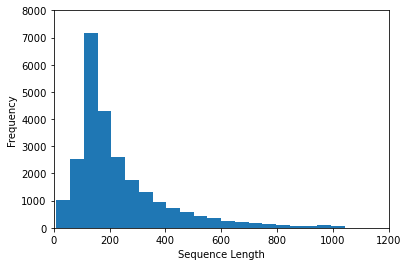

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(numWords, 50)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.axis([0, 1200, 0, 8000])
plt.show()

Виходячи з даних гістограми, а також середньої кількості слів у файлах, ми можемо з упевненістю сказати, що більшість оглядів буде мати менше 250 слів, що є максимальним значенням довжини послідовності, яке ми встановимо.

In [8]:
maxSeqLength = 250

Давайте подивимося, як ми можемо взяти один файл і перетворити його в нашу матрицю ідентифікаторів. Так виглядає один з оглядів в текстовому форматі:

In [9]:
fname = positiveFiles[3] # Можна використовувати будь-який валідний індекс (не лише 3)
with open(fname) as f:
    for lines in f:
        print(lines)
        exit

This is easily the most underrated film inn the Brooks cannon. Sure, its flawed. It does not give a realistic view of homelessness (unlike, say, how Citizen Kane gave a realistic view of lounge singers, or Titanic gave a realistic view of Italians YOU IDIOTS). Many of the jokes fall flat. But still, this film is very lovable in a way many comedies are not, and to pull that off in a story about some of the most traditionally reviled members of society is truly impressive. Its not The Fisher King, but its not crap, either. My only complaint is that Brooks should have cast someone else in the lead (I love Mel as a Director and Writer, not so much as a lead).


Тепер перетворимо наш огляд у матрицю ідентифікаторів:

In [10]:
#Видаляє пунктуацію, круглі дужки, знаки питання і т.д. Лишає тільки буквенно-цифрові символи
import re
strip_special_chars = re.compile("[^A-Za-z0-9 ]+")

def cleanSentences(string):
    string = string.lower().replace("<br />", " ")
    return re.sub(strip_special_chars, "", string.lower())

In [11]:
firstFile = np.zeros((maxSeqLength), dtype='int32')
with open(fname) as f:
    indexCounter = 0
    line=f.readline()
    cleanedLine = cleanSentences(line)
    split = cleanedLine.split()
    for word in split:
        try:
            firstFile[indexCounter] = wordsList.index(word)
        except ValueError:
            firstFile[indexCounter] = 399999 # вектор для невідомих слів
        indexCounter = indexCounter + 1
firstFile

array([    37,     14,   2407, 201534,     96,  37314,    319,   7158,
       201534,   6469,   8828,   1085,     47,   9703,     20,    260,
           36,    455,      7,   7284,   1139,      3,  26494,   2633,
          203,    197,   3941,  12739,    646,      7,   7284,   1139,
            3,  11990,   7792,     46,  12608,    646,      7,   7284,
         1139,      3,   8593,     81,  36381,    109,      3, 201534,
         8735,    807,   2983,     34,    149,     37,    319,     14,
          191,  31906,      6,      7,    179,    109,  15402,     32,
           36,      5,      4,   2933,     12,    138,      6,      7,
          523,     59,     77,      3, 201534,     96,   4246,  30006,
          235,      3,    908,     14,   4702,   4571,     47,     36,
       201534,   6429,    691,     34,     47,     36,  35404,    900,
          192,     91,   4499,     14,     12,   6469,    189,     33,
         1784,   1318,   1726,      6, 201534,    410,     41,    835,
      

Тепер зробимо те саме для кожного з 25 000 наших оглядів. Ми завантажимо їх в наш тренувальний набір і цілочисельно перетворимо його (integerize), щоб отримати матрицю 25000 x 250. І отримаємо нашу матрицю ідентифікаторів. Надалі, щоб не повторювати цей процес у файлі програми будемо просто завантажувати попередньо обчислену матрицю ідентифікаторів: 

In [12]:
# ids = np.zeros((numFiles, maxSeqLength), dtype='int32')
# fileCounter = 0
# for pf in positiveFiles:
#    with open(pf, "r") as f:
#        indexCounter = 0
#        line=f.readline()
#        cleanedLine = cleanSentences(line)
#        split = cleanedLine.split()
#        for word in split:
#            try:
#                ids[fileCounter][indexCounter] = wordsList.index(word)
#            except ValueError:
#                ids[fileCounter][indexCounter] = 399999 # вектор для невідомих слів
#            indexCounter = indexCounter + 1
#            if indexCounter >= maxSeqLength:
#                break
#        fileCounter = fileCounter + 1 

# for nf in negativeFiles:
#    with open(nf, "r") as f:
#        indexCounter = 0
#        line=f.readline()
#        cleanedLine = cleanSentences(line)
#        split = cleanedLine.split()
#        for word in split:
#            try:
#                ids[fileCounter][indexCounter] = wordsList.index(word)
#            except ValueError:
#                ids[fileCounter][indexCounter] = 399999 # вектор для невідомих слів
#            indexCounter = indexCounter + 1
#            if indexCounter >= maxSeqLength:
#                break
#        fileCounter = fileCounter + 1 

# np.save('idsMatrix', ids)

In [13]:
ids = np.load('idsMatrix.npy')

# Допоміжні функції

Нижче наведено кілька допоміжних функцій, які були нам корисні при навчанні мережі на подальшому етапі.

In [14]:
from random import randint

def getTrainBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        if (i % 2 == 0): 
            num = randint(1,11499)
            labels.append([1,0])
        else:
            num = randint(13499,24999)
            labels.append([0,1])
        arr[i] = ids[num-1:num]
    return arr, labels

def getTestBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        num = randint(11499,13499)
        if (num <= 12499):
            labels.append([1,0])
        else:
            labels.append([0,1])
        arr[i] = ids[num-1:num]
    return arr, labels

# RNN Модель

Тепер ми готові почати створювати наш Tensorflow graph. Спочатку нам потрібно визначити деякі гіперпараметри, такі як розмір пакету (batch size), кількість модулів LSTM, кількість класів виведення (output classes) і кількість ітерацій навчання.

In [15]:
batchSize = 24
lstmUnits = 64
numClasses = 2
iterations = 100000

Як і для більшості Tensorflow graphs, нам потрібно вказати два заповнювачі (placeholders), один для входів в мережу і один для міток (labels). Найбільш важливою частиною визначення цих заповнювачів є розуміння їх мірності.

Заповнювач міток (labels placeholder) є набором значень, кожне з яких [1, 0] або [0, 1], в залежності від того, чи є конкретний навчальний приклад позитивним або негативним. Кожен рядок в цілочисельному вхідному заповнювачі (integerized input placeholder) репрезентує цілочисельне представлення кожного навчального прикладу, який ми включаємо в наш пакет (batch).

![caption](Images/SentimentAnalysis12.png)

In [16]:
import tensorflow.compat.v1 as tf
from tensorflow.python.framework import ops

ops.reset_default_graph()
tf.disable_v2_behavior()

labels = tf.placeholder(tf.float32, [batchSize, numClasses])
input_data = tf.placeholder(tf.int32, [batchSize, maxSeqLength])

Instructions for updating:
non-resource variables are not supported in the long term


Як тільки у нас буде заповнювач вхідних даних (input data placeholder), ми можемо викликати функцію tf.nn.lookup(), щоб отримати наші слова-вектори. Виклик цієї функції поверне 3-D Tensor розмірності розміру пакета (dimensionality batch size) за максимальною довжиною послідовності по мірності вектор-слова. Щоб візуалізувати цей 3-D tensor, можна просто представити кожну точку даних в цілочисельному вхідному тензорі (integerized input tensor) як відповідний D-мірний вектор, до якого вона належить.

![caption](Images/SentimentAnalysis13.png)

In [17]:
data = tf.Variable(tf.zeros([batchSize, maxSeqLength, numDimensions]),dtype=tf.float32)
data = tf.nn.embedding_lookup(wordVectors,input_data)

Тепер, коли у нас є дані в потрібному нам форматі, подивимося, як ми можемо подати ці вхідні дані в LSTM мережу. Для цього викличемо функцію tf.nn.rnn_cell.BasicLSTMCell. Ця функція приймає ціле число для потрібної кількості модулів LSTM, які ми хочемо. Це один з гіперпараметрів, який потребує певного налаштування, щоб визначити оптимальне значення. Потім ми помістимо цю комірку LSTM (LSTM cell) в шар випадання (dropout layer), щоб запобігти перевантаженню мережі.

Нарешті, ми подамо комірку LSTM і 3-D tensor, повний вхідних даних, e функцію з ім'ям tf.nn.dynamic_rnn. Ця функція відповідає за розгортання всієї мережі і створення шляху для передачі даних через RNN graph.

In [18]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow.compat.v1 as tf
lstmCell = tf.nn.rnn_cell.BasicLSTMCell(lstmUnits)
lstmCell = tf.nn.rnn_cell.DropoutWrapper(cell=lstmCell, output_keep_prob=0.75)
value, _ = tf.nn.dynamic_rnn(lstmCell, data, dtype=tf.float32)

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


В якості додаткового зауваження, ще одним більш досконалим вибором мережевої архітектури є розміщення декількох комірок LSTM одна на одній. Ось де останній прихований вектор стану першої комірки LSTM подається у другу. 

Об'єднання цих комірок є відмінним способом допомогти моделі зберегти більше інформації про довгострокову залежність (long term dependence), та вводячи більше параметрів в модель, ви, таким чином, збільшуєте час навчання, з’являється потреба в додаткових навчальних прикладах і шанс перенавчання (overfitting). Для отримання додаткової інформації про об’єднання комірок LSTM - ознайомтеся з документацією Tensorflow [тут](https://www.tensorflow.org/tutorials/recurrent#stacking_multiple_lstms).

Перший вихід (output) динамічної функції RNN можна розглядати як останній вектор прихованого стану. Цей вектор буде змінено, а потім помножено на кінцеву вагову матрицю і постійний зсув (bias term), щоб отримати остаточні вихідні значення.

In [19]:
weight = tf.Variable(tf.truncated_normal([lstmUnits, numClasses]))
bias = tf.Variable(tf.constant(0.1, shape=[numClasses]))
value = tf.transpose(value, [1, 0, 2])
last = tf.gather(value, int(value.get_shape()[0]) - 1)
prediction = (tf.matmul(last, weight) + bias)

Далі ми визначимо показники (метрики) правильного прогнозування і точності, щоб відстежувати роботу мережі. Правильне прогнозування (correct prediction formulation) працює, переглядаючи індекс максимального значення двох вихідних значень, а потім перевіряючи, чи відповідають вони навчальним міткам (training labels).

In [20]:
correctPred = tf.equal(tf.argmax(prediction,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))

Ми визначимо стандартну крос-ентропійну втрату (cross entropy loss) за допомогою шару softmax (softmax layer), поміщеним поверх остаточних значень прогнозу. Для оптимізатора ми використовували алгоритм оптимізації Адама і швидкість навчання за замовчуванням 0.001.

In [21]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=labels))
optimizer = tf.train.AdamOptimizer().minimize(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Наступний фрагмент коду ми використовували для візуалізації значень втрат та точності у Tensorboard: 

In [22]:
import datetime

tf.summary.scalar('Loss', loss)
tf.summary.scalar('Accuracy', accuracy)
merged = tf.summary.merge_all()
logdir = "tensorboard/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "/"
writer = tf.summary.FileWriter(logdir, sess.graph)

# Налаштування гіперпараметрів (Hyperparameter tuning)

Вибір правильних значень для гіперпараметрів є важливою частиною ефективного тренування глибоких нейронних мереж, бо криві втрат при навчанні можуть сильно варіюватися в залежності від вибору оптимізатора (Adam, Adadelta, SGD і т. д.), а також від швидкості навчання та мережної архітектури. Зокрема, для RNN і LSTM деякими іншими важливими факторами є кількість модулів LSTM і розмір вектор-слів.

* *Швидкість навчання*: RNN відомі тим, що їх важко навчати через велику кількість часових кроків, які вони мають. Швидкість навчання стає надзвичайно важливою, оскільки нам не потрібно, щоб наші вагові значення (weight values) коливалися в результаті великій швидкості навчання, і при цьому ми не хочемо повільного процесу навчання через низьку швидкості. Значення за замовчуванням 0.001 – гарний варіант для початку. Слід збільшувати це значення, якщо втрата під час тренування (training loss) змінюється дуже повільно, і зменшити, якщо втрата нестабільна.


* *Вибір оптимізатора*: у розробників нейронних мереж нема одностайного вибору, але алгоритм Адама користується широкою популярністю завдяки наявності властивості адаптивної швидкості навчання (та слід пам’ятати, що оптимальні швидкості навчання можуть відрізнятися в залежності від вибору оптимізатора).


* *Кількість модулів LSTM*: Це значення в значній мірі залежить від середньої довжини вхідних текстів. У той час як більша кількість модулів забезпечує більшу виразність (чіткість) для моделі і дозволяє моделі зберігати більше інформації для довших текстів, навчання мережі займе більше часу і буде  дорого коштувати в обчислювальному відношенні.


* *Розмір вектор-слова*: Розміри вектор-слів зазвичай варіюються від 50 до 300. Більший розмір означає, що вектор здатний інкапсулювати більше інформації про слово, але слід також очікувати більш обчислювально дорогу модель.

# Тренування

Основна ідея тренувального процесу полягає в тому, що ми спочатку визначаємо сеанс Tensorflow. Потім ми завантажуємо пакети оглядів і пов’язані з ними мітки. Далі ми викликаємо функцію ініціації сеансу. Ця функція має два аргументи.

Перший називається аргументом «вибірки» (“fetches” argument). Він визначає значення, яке нас цікавить в обчисленнях. Ми хочемо, щоб наш оптимізатор обчислювався, так як це компонент, який мінімізує нашу функцію втрат. 

Другий аргумент - це те, де ми вводимо наш `feed_dict`. Ця структура даних де ми надаємо вхідні дані всім нашим заповнювачам (placeholders). Нам потрібно надати наші пакети оглядів (batch of reviews) і пакети міток (batch of labels). Потім цей цикл повторюється для заданої кількості навчальних ітерацій.

Тренування відбувалось за допомогою наведеного нижче коду, а за відслідковуванням ми мали змогу наглядати за допомогою TensorBoard на http://localhost:6006/.

Щоб мати змогу відслідковувати процес у TensorBoard треба ввести наступне у Anaconda Prompt: `tensorboard --logdir=tensorboard`.

In [23]:
# sess = tf.InteractiveSession()
# saver = tf.train.Saver()
# sess.run(tf.global_variables_initializer())

# for i in range(iterations):
#    # наступний пакет оглядів/відгуків
#    nextBatch, nextBatchLabels = getTrainBatch();
#    sess.run(optimizer, {input_data: nextBatch, labels: nextBatchLabels})

#    # передача поточних даних до TenserBoard
#    if (i % 50 == 0):
#        summary = sess.run(merged, {input_data: nextBatch, labels: nextBatchLabels})
#        writer.add_summary(summary, i)

#    # зберігання мережі кожні 10 000 навчальних ітерацій
#    if (i % 10000 == 0 and i != 0):
#        save_path = saver.save(sess, "models/pretrained_lstm.ckpt", global_step=i)
#        print("збережено до %s" % save_path)
# writer.close()

# Завантаження тренованої моделі

Криві точності та втрат нашої моделі під час тренування:

**Точність (Accuracy)**
![caption](Images/SentimentAnalysis6.png)

**Втрати (Loss)**
![caption](Images/SentimentAnalysis7.png)

Дивлячись на криві навчання, наведені вище, можна зробити висновок, що тренування моделі пройшло добре. Втрати неухильно знижуються, а точність наближається до 100 відсотків. Однак при аналізі кривих навчання слід також звернути особливу увагу на можливість перенавчання (overfitting) нашої моделі набору даних.

Перенавчання є поширеним явищем в машинному навчанні, коли модель стає настільки придатною для тренувальних даних, що втрачає можливість узагальнення для тестового набору. Це означає, що тренування мережі, поки ви не досягнете 0 тренувальних втрат, може бути не кращим способом отримати точну модель, яка добре працює з даними, які вона ніколи не бачила раніше. 

Рання зупинка - це інтуїтивно зрозумілий метод, що часто використовується в мережах LSTM для боротьби з цією проблемою. Основна ідея полягає в тому, що ми навчаємо модель на нашому тренувальному наборі, а також вимірюємо її продуктивність на тестовому наборі час від часу. Як тільки помилка тесту припинить своє стійке зменшення і почне замість цього збільшуватися, ви будете знати, що потрібно припинити навчання, оскільки це ознака того, що мережа почала перевантажуватися.

Для завантаження навченої моделі нам треба ще один сеанс Tensorflow, створення об'єкта Saver, а потім використання цього об'єкта для виклику функції відновлення. Ця функція приймає 2 аргументи: один для поточного сеансу і один для збереженої моделі.

In [24]:
sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, tf.train.latest_checkpoint('models'))

INFO:tensorflow:Restoring parameters from models\pretrained_lstm.ckpt-90000


Потім ми завантажимо кілька оглядів фільмів з нашого тестового набору. Це огляди, на яких модель не навчалася і ніколи не бачила раніше. Точність кожного тестового пакету (test batch) можна побачити, запустивши наступний код: 

In [25]:
iterations = 10
for i in range(iterations):
    nextBatch, nextBatchLabels = getTestBatch();
    print("Accuracy for this batch:", (sess.run(accuracy, {input_data: nextBatch, labels: nextBatchLabels})) * 100)

Accuracy for this batch: 87.5
Accuracy for this batch: 70.83333134651184
Accuracy for this batch: 83.33333134651184
Accuracy for this batch: 75.0
Accuracy for this batch: 83.33333134651184
Accuracy for this batch: 79.16666865348816
Accuracy for this batch: 75.0
Accuracy for this batch: 75.0
Accuracy for this batch: 83.33333134651184
Accuracy for this batch: 83.33333134651184


# Висновок

Ми розглянули різні компоненти, задіяні у всьому процесі, в тому числі теоретичні аспекти і  процес написання коду з допомогою Tensorflow для практичної реалізації моделі. Далі ми навчили і протестували модель, щоб вона могла класифікувати огляди фільмів.